### Importation de packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

### Chargement de données

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### prétraitement de données

In [3]:
data['Genre'] = np.where(data['Genre'] == 'Male', 1,0)

In [4]:
x= data.iloc[:, 3:5].values

### Nombre optimal des clusters

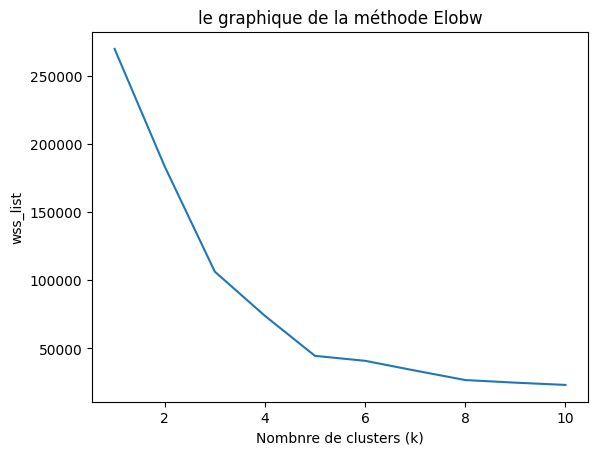

In [5]:
wss_list = []

for i in range(1,11): 
    kmeans= KMeans(n_clusters=i, init = 'k-means++', random_state=42)
    kmeans.fit(x)
    wss_list.append(kmeans.inertia_)
plt.plot (range(1,11),wss_list)
plt.xlabel("Nombnre de clusters (k)")
plt.ylabel ("wss_list")
plt.title ("le graphique de la méthode Elobw")
plt.show()

### Entrainement de l'algorithme  K-means

In [6]:
kmeans= KMeans(n_clusters=5, init = 'k-means++', random_state=42)

y_predict = kmeans.fit_predict(x)

### Visualisation des clusters

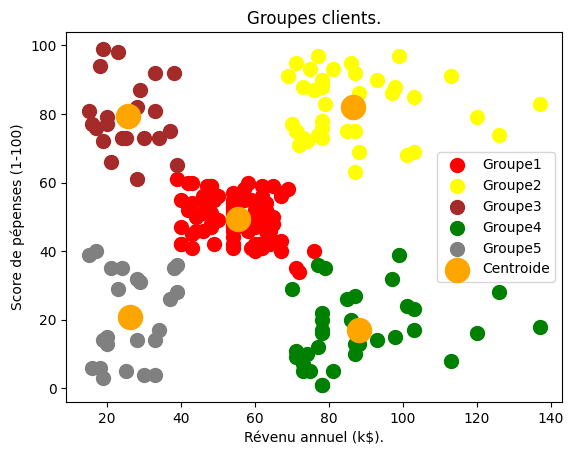

In [7]:
plt.scatter(x[y_predict == 0,0],x[y_predict == 0,1],s=100, color = 'red', label = "Groupe1")
plt.scatter(x[y_predict == 1,0],x[y_predict == 1,1], s=100, color = 'yellow', label = "Groupe2")
plt.scatter(x[y_predict == 2,0],x[y_predict == 2,1], s=100, color = 'brown', label = "Groupe3")
plt.scatter(x[y_predict == 3,0],x[y_predict == 3,1], s=100, color = 'green', label = "Groupe4")
plt.scatter(x[y_predict == 4,0],x[y_predict == 4,1], s=100, color = 'gray', label = "Groupe5")
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:,1], s=300, color = 'orange', label = 'Centroide')
plt.xlabel("Révenu annuel (k$).")
plt.ylabel ("Score de pépenses (1-100)")
plt.title ("Groupes clients.")
plt.legend ()
plt.show()